# Assignment6

In [1]:
import pandas as pd
from pandas import set_option
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import cross_val_score, train_test_split,cross_validate
from sklearn.metrics import mean_squared_error,r2_score,confusion_matrix
from sklearn.compose import ColumnTransformer

#tensorflow
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

print(tf.__version__)

2.4.1


In [2]:
import warnings
warnings.filterwarnings('ignore')

In [8]:
df = pd.read_csv("df_wo_genres.csv")

In [14]:
dup = df['budget'].duplicated().tolist()

In [16]:
count = 0
for i,d in enumerate(dup):
    if dup[i] == True:
        count+=1
count        
    

3814

In [10]:
df.index[df.duplicated() == True].tolist()

[]

# split data into train/test

In [5]:
train_dataset = df.sample(frac=0.9, random_state=1)
test_dataset = df.drop(train_dataset.index)

In [6]:
train_dataset

,budget,runtime,popularity,vote_average,release_month,revenue
1488,85000000.0,95.0,4.917863,5.3,3,77741732.0
4337,8000000.0,103.0,9.609879,7.5,11,82703.0
2753,60000000.0,101.0,7.094624,5.9,9,73174566.0
661,2000000.0,91.0,2.740989,5.8,9,124494.0
891,463455.0,84.0,0.445526,8.0,5,966878.0
...,...,...,...,...,...,...
3976,2745000.0,88.0,0.635350,7.5,8,5850000.0
1207,28000000.0,99.0,6.000716,4.6,12,33000337.0
2077,3768785.0,107.0,2.090588,7.3,5,8000000.0
1590,3000000.0,89.0,2.850011,6.1,9,13308.0


In [7]:
train_features = train_dataset.copy()
test_features = test_dataset.copy()

train_labels = train_features.pop('revenue')
test_labels = test_features.pop('revenue')

In [8]:
test_labels

15      21284514.0
20      25836616.0
42      31596911.0
63      20350754.0
70       2616503.0
           ...    
4382       11455.0
4384     4864560.0
4389     9420546.0
4392     2000000.0
4397    56100000.0
Name: revenue, Length: 440, dtype: float64

In [9]:
train_dataset.describe().transpose()[['mean', 'std']]

,mean,std
budget,2.088541e+07,2.083349e+07
runtime,1.067449e+02,1.651543e+01
popularity,8.017973e+00,4.136731e+00
vote_average,6.244537e+00,8.367700e-01
release_month,6.841030e+00,3.428208e+00
revenue,4.480586e+07,5.356830e+07


# parameters optimization + build model

In [10]:
# DNN using budget
dnn_model_budget = keras.Sequential([
    layers.Dense(128, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(1)
])

In [11]:
dnn_model_budget.compile(loss='mean_squared_error', 
                  optimizer=tf.keras.optimizers.Nadam(0.00001))

In [12]:
def plot_loss(history):
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    #plt.ylim([0, 10])
    plt.xlabel('Epoch')
    plt.ylabel('Error')
    plt.legend()
    plt.grid(True)

In [13]:
hist=dnn_model_budget.fit(
    train_features['budget'], train_labels,
    validation_split=0.2,
    verbose=0, epochs=100)

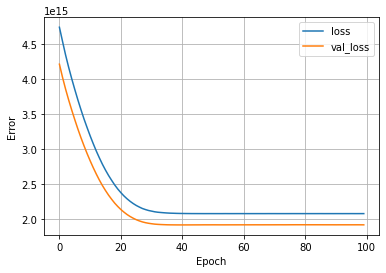

In [14]:
plot_loss(hist)

# Prediction

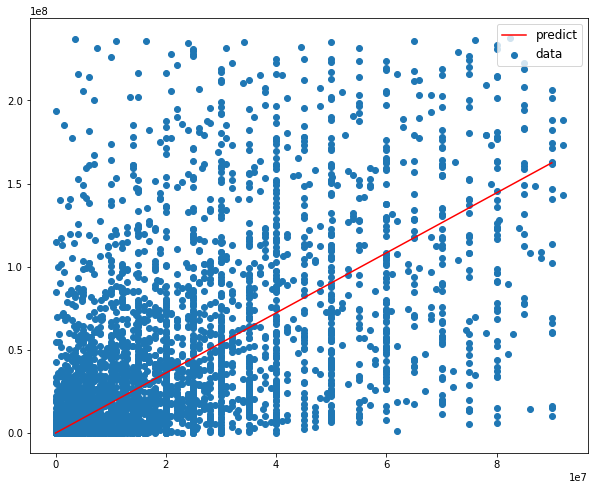

In [15]:
# predict and plot
range_min = np.min(test_features['budget'])
range_max = np.max(test_features['budget'])
x = tf.linspace(range_min,range_max,200)
y = dnn_model_budget.predict(x)

plt.figure(figsize=(10, 8))
plt.scatter(train_features['budget'],train_labels,label='data')
plt.plot(x,y,color='red',label='predict')
plt.legend(prop={'size': 12})

In [16]:
r2_score(test_labels,dnn_model_budget.predict(test_features['budget']))

0.3678237449420074

In [17]:
#popularity
dnn_model_popularity = keras.Sequential([
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
])

In [18]:
dnn_model_popularity.compile(loss='mean_absolute_error', 
                  optimizer=tf.keras.optimizers.Adam(0.001))

In [19]:
hist=dnn_model_popularity.fit(
    train_features['popularity'], train_labels,
    validation_split=0.25,
    verbose=1, epochs=200)

Epoch 1/200
93/93 [==============================] - 1s 3ms/step - loss: 45395669.5319 - val_loss: 44501600.0000
Epoch 2/200
93/93 [==============================] - 0s 2ms/step - loss: 45505095.2340 - val_loss: 44501320.0000
Epoch 3/200
93/93 [==============================] - 0s 2ms/step - loss: 46269987.3617 - val_loss: 44500532.0000
Epoch 4/200
93/93 [==============================] - 0s 2ms/step - loss: 45445274.0426 - val_loss: 44498888.0000
Epoch 5/200
93/93 [==============================] - 0s 3ms/step - loss: 45061158.9362 - val_loss: 44496184.0000
Epoch 6/200
93/93 [==============================] - 0s 2ms/step - loss: 45225820.8085 - val_loss: 44492152.0000
Epoch 7/200
93/93 [==============================] - 0s 2ms/step - loss: 45031611.8723 - val_loss: 44486604.0000
Epoch 8/200
93/93 [==============================] - 0s 2ms/step - loss: 44895245.7447 - val_loss: 44479380.0000
Epoch 9/200
93/93 [==============================] - 0s 2ms/step - loss: 44711547.7872 - val_los

Epoch 73/200
93/93 [==============================] - 0s 2ms/step - loss: 39108863.1064 - val_loss: 39524008.0000
Epoch 74/200
93/93 [==============================] - 0s 2ms/step - loss: 39463849.9574 - val_loss: 39402304.0000
Epoch 75/200
93/93 [==============================] - 0s 2ms/step - loss: 39063212.6383 - val_loss: 39278472.0000
Epoch 76/200
93/93 [==============================] - 0s 2ms/step - loss: 40190411.6170 - val_loss: 39155656.0000
Epoch 77/200
93/93 [==============================] - 0s 2ms/step - loss: 38825876.3617 - val_loss: 39030812.0000
Epoch 78/200
93/93 [==============================] - 0s 2ms/step - loss: 37729478.7021 - val_loss: 38904528.0000
Epoch 79/200
93/93 [==============================] - 0s 2ms/step - loss: 39513882.2979 - val_loss: 38779008.0000
Epoch 80/200
93/93 [==============================] - 0s 2ms/step - loss: 39569829.1489 - val_loss: 38654624.0000
Epoch 81/200
93/93 [==============================] - 0s 2ms/step - loss: 37659112.8511 

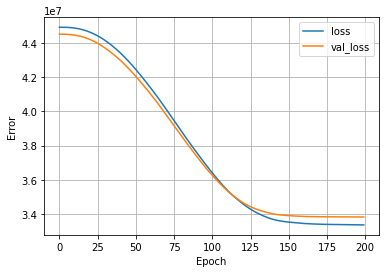

In [20]:
plot_loss(hist)

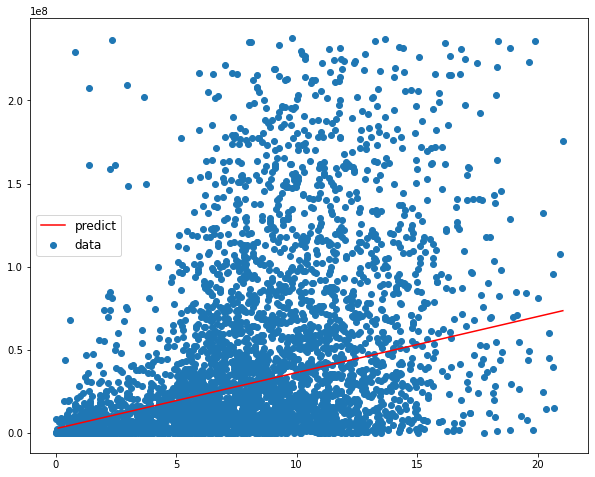

In [21]:
# predict and plot
range_min = np.min(test_features['popularity'])
range_max = np.max(test_features['popularity'])
x = tf.linspace(range_min,range_max,200)
y = dnn_model_popularity.predict(x)

plt.figure(figsize=(10, 8))
plt.scatter(train_features['popularity'],train_labels,label='data')
plt.plot(x,y,color='red',label='predict')
plt.legend(prop={'size': 12})

In [22]:
test_labels = dnn_model_popularity.predict(test_features['budget']) * 1e3

In [23]:
r2_score(test_labels,dnn_model_popularity.predict(test_features['popularity']))

-0.99009387005658

In [24]:
dfsdfsdfdsf

NameError: name 'dfsdfsdfdsf' is not defined

In [9]:
#sklearn
model_budget = LinearRegression()

budget_feature = df[['budget']]

In [10]:
X = np.array(budget_feature)
y = np.array(df['revenue'])

# Scikitlearn Regression Models

In [11]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [12]:
model_budget.fit(X_train,y_train)

LinearRegression()

In [13]:
min_x = np.min(X_test)
max_x = np.max(X_test)
x_t = np.linspace(min_x,max_x,200)
x_t = x_t.reshape(-1,1)
y = model_budget.predict(x_t)

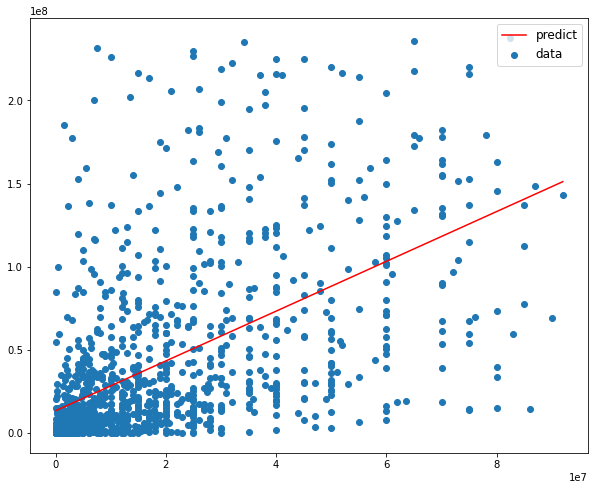

In [14]:
plt.figure(figsize=(10, 8))
plt.plot(x_t,y,color='red',label='predict')
plt.scatter(X_test,y_test,label='data')
plt.legend(prop={'size': 12})

In [15]:
print(cross_val_score(model_budget, X_test, y_test, cv=5))

[0.10612425 0.35002342 0.28078663 0.2704684  0.36246325]


In [16]:
model_popularity = LinearRegression()

In [17]:
popularity_feature = df[['popularity']]

In [18]:
X = np.array(popularity_feature)
y = np.array(df['revenue'])

In [19]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [20]:
model_popularity.fit(X_train,y_train)

LinearRegression()

In [21]:
x = model_popularity.predict(X_test)

In [22]:
min_x = np.min(X_test)
max_x = np.max(X_test)
x_t = np.linspace(min_x,max_x,200)
x_t = x_t.reshape(-1,1)
y = model_popularity.predict(x_t)

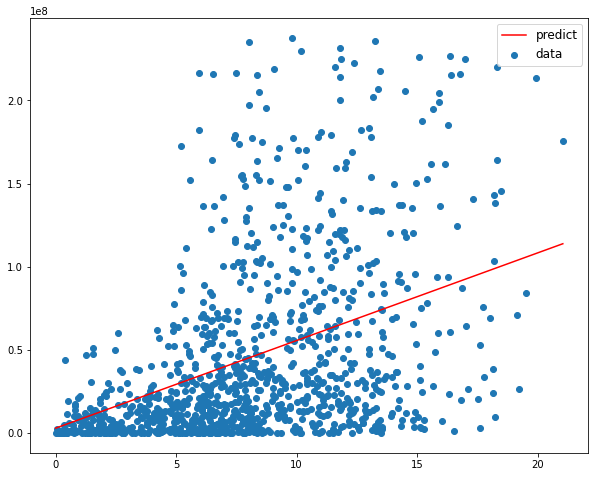

In [23]:
plt.figure(figsize=(10, 8))
plt.plot(x_t,y,color='red',label='predict')
plt.scatter(X_test,y_test,label='data')
plt.legend(prop={'size': 12})

In [24]:
print(cross_val_score(model_popularity, X_test, y_test, cv=5))

[0.1591443  0.19443956 0.19707364 0.20109114 0.18183981]
